# Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [2]:
import numpy as np
A = np.array([
    [1,100],
    [2,10],
    [3,0]
])
B = np.array([
    [1,0],
    [0,2],
    [0,3],
    [0,0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [4]:
# this is in the column space of A
A @ np.array([1,1]).reshape(-1,1)

array([[101],
       [ 12],
       [  3]])

In [6]:
# this is in the column space of A
A @ np.array([2,0]).reshape(-1,1)

array([[2],
       [4],
       [6]])

In [7]:
# this is in the column space of A
A @ np.array([0,-1]).reshape(-1,1)

array([[-100],
       [ -10],
       [   0]])

In [8]:
# this is in the column space of A
A @ np.array([0,0]).reshape(-1,1)

array([[0],
       [0],
       [0]])

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [15]:
# in the column space of B: a, c, e
# not in the column space: b (can't mix 0 and 0 to get non zero)
#                          d (can't multipy two positives by a const to get negative and positive)
c = np.array([-1, 1]).reshape(-1,1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

# Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

## Fruit Sales Example

### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

### Equations

* `10*apple + basket == 7`
* `2*apple + 8*banana + basket == 5`
* `4*apple + 4*banana + basket == 5`

### Matrix

In [17]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
])
y = np.array([7,5,5]).reshape(-1,1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [18]:
np.array([[2,8,1]]) @ c

array([[5.]])

In [19]:
np.array([[5,5,1]]) @ c

array([[5.75]])

In [20]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [5,5,1],
])
y = np.array([7,5,5,5.75]).reshape(-1,1) # mathematically solveable, but not by np.linalg.solve

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

In [22]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [5,5,1],
    [5,5,1],
])
y = np.array([7,5,5,5.75,6]).reshape(-1,1) # mathematically unsolveable because of the contradiction

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

### Equivalent Statements

* there's a solution for the system of equations
* there's a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

# The Problem with Most Tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [23]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 5,  5,  1],
       [ 5,  5,  1]])

In [24]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75],
       [6.  ]])

In [28]:
c = np.linalg.solve(X.T@X, X.T@y)
c

array([[0.53030303],
       [0.28409091],
       [1.74242424]])

In [27]:
(X.T@X).shape # will always be square

(3, 3)

In [29]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75],
       [6.  ]])

In [30]:
X @ c

array([[7.04545455],
       [5.07575758],
       [5.        ],
       [5.81439394],
       [5.81439394]])

# Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

## Fruit Sales Example

In [31]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [32]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [33]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [35]:
P @ y # (1) in the column space of X, (2) P@y is as "near" y as possible

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

## Scatter Example

In [55]:
import pandas as pd
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df

,x,y
0,8.118671,16.588118
1,7.651888,15.140371
2,4.200298,10.038345
3,9.476265,19.094283
4,8.576396,18.502219
5,4.208759,7.116976
6,3.358351,7.928191
7,6.829769,13.168751
8,2.997685,7.779547
9,1.185329,2.264521


<AxesSubplot:xlabel='x', ylabel='y'>

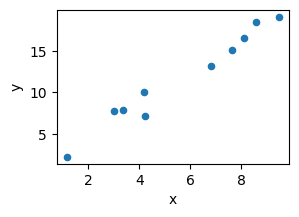

In [56]:
df.plot.scatter(x="x", y="y", figsize=(3,2))

In [57]:
X = df[["x"]].values
X

array([[8.118671  ],
       [7.65188801],
       [4.20029799],
       [9.47626501],
       [8.5763961 ],
       [4.20875881],
       [3.35835106],
       [6.82976853],
       [2.99768469],
       [1.18532891]])

In [58]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P @ df[["y"]].values

array([[16.69064312],
       [15.73101459],
       [ 8.63511709],
       [19.48163159],
       [17.63165011],
       [ 8.65251113],
       [ 6.90421364],
       [14.04087307],
       [ 6.16274331],
       [ 2.43683995]])

In [59]:
df["p"] = P @ df[["y"]].values
df

,x,y,p
0,8.118671,16.588118,16.690643
1,7.651888,15.140371,15.731015
2,4.200298,10.038345,8.635117
3,9.476265,19.094283,19.481632
4,8.576396,18.502219,17.631650
5,4.208759,7.116976,8.652511
6,3.358351,7.928191,6.904214
7,6.829769,13.168751,14.040873
8,2.997685,7.779547,6.162743
9,1.185329,2.264521,2.436840


<AxesSubplot:xlabel='x', ylabel='p'>

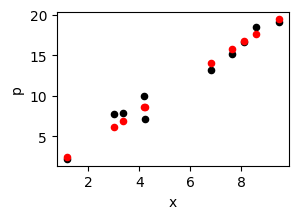

In [60]:
ax = df.plot.scatter(x="x", y="y", figsize=(3,2), color="k")
df.plot.scatter(x="x", y="p", figsize=(3,2), color="r", ax=ax)

# Euclidean Distance Between Columns

In [61]:
df2 = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
df2

,v1,v2
x,1,4
y,8,12


In [62]:
# what is the distance between v1 and v2?
((df2["v2"] - df2["v1"]) ** 2).sum() ** 0.5

5.0

In [65]:
# smallest possible for an p, that is still in the column space of X
((df["y"] - df["p"]) ** 2).sum() ** 0.5

3.1697149817774464